
<h1 style="text-align:center"> Loan Data from Prosper </h1>
<p style="text-align:center"> By Mohamed Safwan </p>

## Dataset Overview

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated loans to more than 870,000 people.<br>

## Investigation Overview

- Does Prosper give loan based on employment status?
- Does Prosper give out with income as part of their consideration?
- What is the most common occupation of the borrowers?
- what is the borrower's APR for people who has a loan?
- What are factors which can affect the borrower's rate?
- What is the yearly borrower rates?
- Does yearly prosper Score or homeowner affect borrower's rate?


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Data wrangling process:

# Creat a copy of the the data frame 
df_clean = df.copy()

# rename the columns to be easier during coding
df_clean.rename(columns=lambda x: x.lower().replace(' ', "").replace('(', "_").replace(')', ""), inplace = True)

# fill the null rows with value "unknown" at the employmentstatus column
df_clean.employmentstatus.fillna("Not available", inplace=True)

# fill the null rows with value "Other" at the occupation column
df_clean.occupation.fillna('Other', inplace=True)

#  convert the column to date and time then remove the seconds part
df_clean.listingcreationdate = pd.to_datetime(df_clean.listingcreationdate, format="%Y-%m-%d %H:%M:%S").dt.floor('T')




In [4]:
# Ploting Funtions 

# Count plot function 
def count_plot(data,color, x_ = None, y_=None):
    
    if x_:
        plt.figure(figsize=[8, 5])
        sb.countplot(data = data, x = x_.replace(' ',"").lower(),color = sb.color_palette()[color],
                     order=data[x_.replace(' ',"").lower()].value_counts().index)
        plt.title(x_ + "Distribution")
        plt.ylabel('Count')
        plt.xlabel(x_)
        plt.xticks(rotation=45)
    if y_:
        plt.figure(figsize=[11,15])
        sb.countplot(data = data, y=y_.replace(' ',"").lower(),color = sb.color_palette()[color],
                     order=data[y_.replace(' ',"").lower()].value_counts().index)
        plt.xscale('log')
        plt.title(y_ + "Distribution")
        plt.ylabel(y_)
        plt.xlabel('Count');
        

# Bivariate plot Function 
def bivar_plt(data, x_, y_, color, order=None):
    plt.figure(figsize=[15, 8])
    sb.violinplot(data = data, x = x_.replace(' ','').lower(),
                  y = y_.replace(' ','').lower(), color=sb.color_palette()[color], order=order)
    plt.title(x_ + " vs. " + y_)
    plt.ylabel(y_)
    plt.xlabel(x_)
    plt.xticks(rotation=45);
    
# Box plot function
def box_plt(data, x_title, y_title, color, hue_=None):
    plt.figure(figsize=[10, 8])
    sb.boxplot(data = data, x = x_title.replace(' ',"").lower(), y = y_title.replace(' ',"").lower(),
               hue = hue_, color = sb.color_palette()[color])
    plt.ylabel(y_title)
    plt.xlabel(x_title);

## Employment Status
The employment status of the borrower at the time they posted the listing.<br>

Does Prosper give loan based on employment status?<br>

- The plot shows that unemployed , part time and retired individuals can rarely obtain a loan from Prosper.<br>
- It is most common that employed and full time individuals obtain a loan from Porsper.

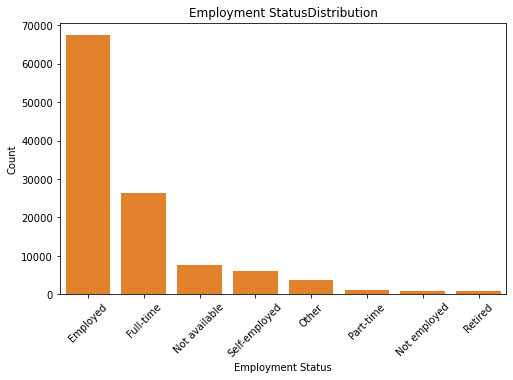

In [5]:
count_plot(df_clean,1,'Employment Status')

## Borrower Rate
The Borrower's interest rate for the loan.<br>


What is the borrower's APR for people who has a loan?

- The plot is almost identical to that of BorrowerAPR, just shifted left a bit.<br>
- The peak is at around 0.17 , which is the highest peak.

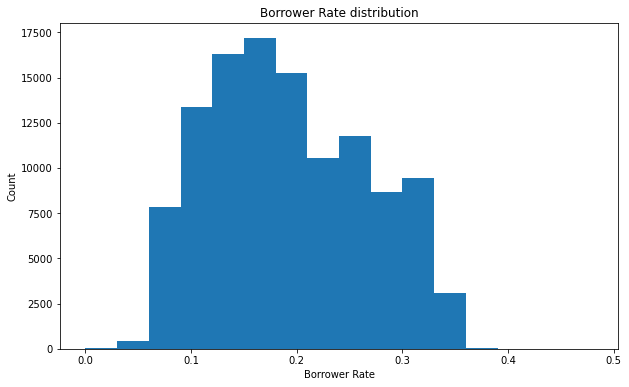

In [6]:
# plot a histogram to show the borrow rate distribution
plt.figure(figsize=[10, 6])
bins_ = np.arange(0,df_clean['borrowerrate'].value_counts().index.max(),0.03)
plt.hist(data = df_clean, x = 'borrowerrate', bins = bins_)

plt.title('Borrower Rate distribution')
plt.xlabel('Borrower Rate')
plt.ylabel('Count');

## Borrower Rate vs. Employment status
I want to find out the relationship between the borrower's rate and the employment status.<br>
Does Prosper determine the rate based on employment status?<br>

Individual who is employed don't necessarily have low borrower rate.<br>
Unemployment individual has a high median rate and high concentrate frequency above the median.

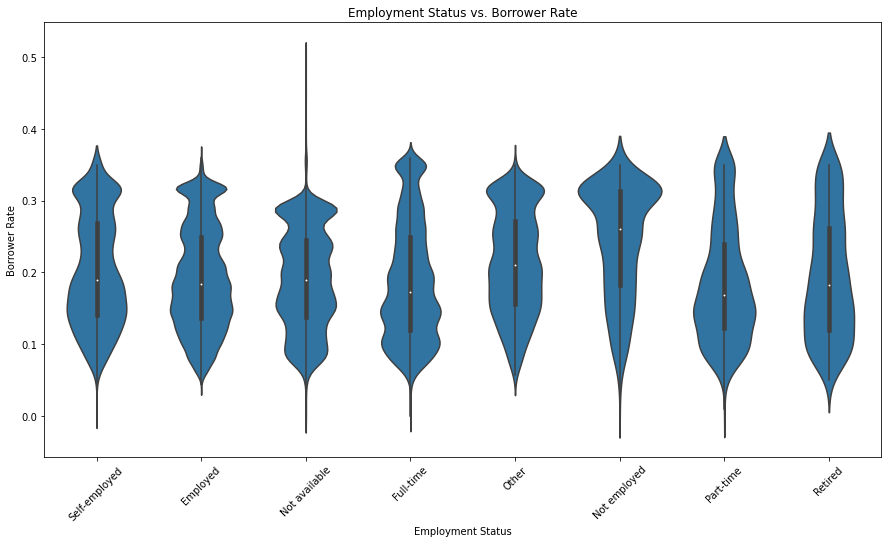

In [7]:
# Bivariate plot of  employment status and borrower rate
bivar_plt(df_clean, 'Employment Status', 'Borrower Rate', 0)

## Yearly Borrower Rates
What is the yearly borrower rates?<br>
Does the borrow rate increase by time?<br>

 The plot shows that:
- The year 2005 represents the minimum average borrower rate.
- Borrower rate goes up after 2008 until 2011.
- Since 2011, the rate started going down until 2014.

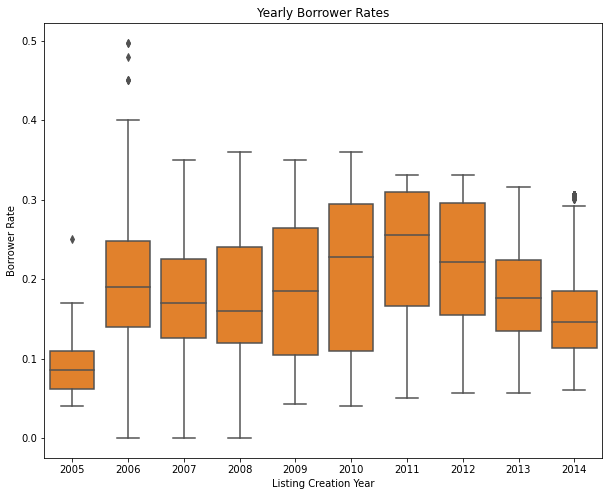

In [8]:
# Creat a new column for listing creation year
df_clean['listingcreationyear'] = df_clean.listingcreationdate.dt.year

# plot the yearly borrower rates
box_plt(df_clean, 'Listing Creation Year', 'Borrower Rate', 1)
plt.title('Yearly Borrower Rates');

## Borrower rates vs. Prosper Score
Is Prosper Score considered an factor to determine the borrower rate?<br>

This plot shows that:
- There is a strong correlation between the prosper score with the  borrower rate.
- The higher the prosper score is, the lower the borrower rate is.
- The prosper score is a an important factor to determinate the borrower rate.

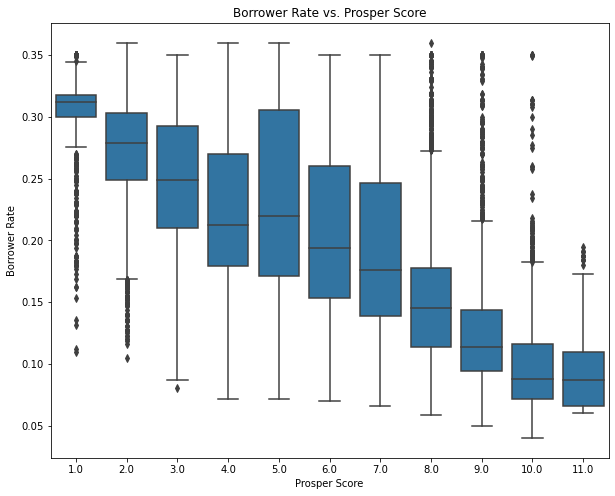

In [9]:
# plot the borrower rates vs prosper score
box_plt(df_clean, 'Prosper Score', 'Borrower Rate', 0)
plt.title('Borrower Rate vs. Prosper Score');

## Yearly Borrower rate vs. Home-owner
Does being a homeowner affect borrower rate?

The plot shows that homeowners always have alower rate than non-homeowners.

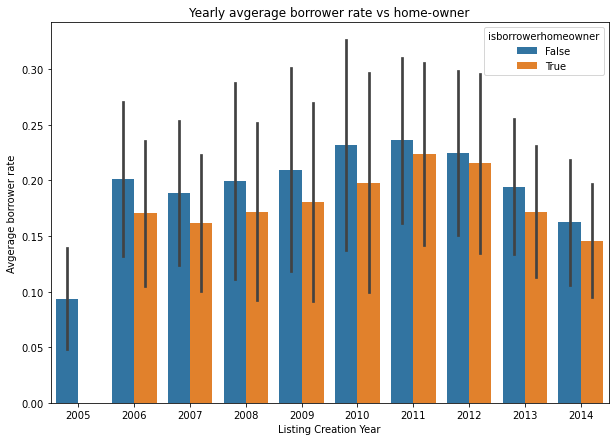

In [10]:

plt.figure(figsize=[10, 7])
sb.barplot(data = df_clean, x = 'listingcreationyear', y = 'borrowerrate',
           hue = 'isborrowerhomeowner', ci = 'sd')
plt.xlabel('Listing Creation Year')
plt.ylabel('Avgerage borrower rate')
plt.title('Yearly avgerage borrower rate vs home-owner');

### Year Borrower Rate vs. Prosper Score vs. Is_HomeOwner
Does yearly prosper Score and homeowner affect borrower's rate?<br>

The trend here is similar to the previous graph. I notice that for score 5 or above, homeowners have lower rate, and for scores below 5, homeowners have similar or higher borrowing rate.

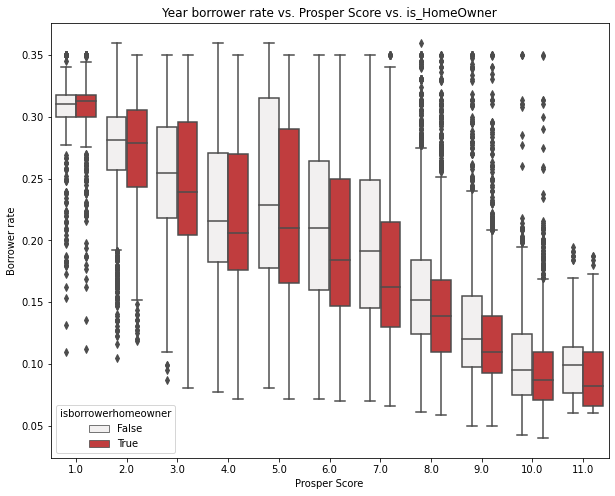

In [11]:
# plot the borrower rates vs prosper score
box_plt(df_clean, 'Prosper Score', 'Borrower rate', 3, 'isborrowerhomeowner')
plt.title('Year borrower rate vs. Prosper Score vs. is_HomeOwner');

In the bar plot graph it is clear that homeowners always have a lower rate than non-homeowners but when we take the prosper score into our cosideration we can notice that for score 5 or above, homeowners have lower rate, and for scores below 5, homeowners have similar or higher borrowing rate.

In [1]:
# Saving the slides without code
!jupyter nbconvert explanation_prosperLoanData.ipynb --to slides --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook explanation_prosperLoanData.ipynb to slides
[NbConvertApp] Writing 797855 bytes to explanation_prosperLoanData.slides.html
